历史k线最高价与最低价相关系数

In [ ]:
import polars as pl
import numpy as np

# 读取数据
df = pl.read_parquet("hourly_data.pa")

# 设置窗口大小 N
N = 65

# 创建一个空的列表来存储结果
result_rows = []

# 获取所有的 unique symbols
symbols = df["symbol"].unique()

# 计算相关系数的函数
def rolling_corr(high, low):
    return np.corrcoef(high, low)[0, 1]

# 使用 groupby 进行分组并计算滚动窗口的相关系数
def calculate_rolling_corr(group):
    high_series = group["high"].to_numpy()
    low_series = group["low"].to_numpy()

    rolling_correlations = []
    for i in range(N - 1, len(high_series)):
        high_window = high_series[i - N + 1:i + 1]
        low_window = low_series[i - N + 1:i + 1]
        correlation = rolling_corr(high_window, low_window)
        rolling_correlations.append(correlation)

    return pl.DataFrame({
        "open_time": group["open_time"][N - 1:],
        "symbol": group["symbol"][N - 1:],
        "correlation": rolling_correlations
    })

# 使用groupby进行分组并应用函数
result_df = df.groupby("symbol").apply(calculate_rolling_corr)

# 打印结果
print(result_df)


/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_20596/4003284233.py:39: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  result_df = df.groupby("symbol").apply(calculate_rolling_corr)
/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_20596/4003284233.py:39: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_groups`.
  result_df = df.groupby("symbol").apply(calculate_rolling_corr)


shape: (2_473_770, 3)
┌─────────────────────┬─────────┬─────────────┐
│ open_time           ┆ symbol  ┆ correlation │
│ ---                 ┆ ---     ┆ ---         │
│ datetime[μs]        ┆ str     ┆ f64         │
╞═════════════════════╪═════════╪═════════════╡
│ 2020-09-07 18:00:00 ┆ SRMUSDT ┆ 0.934298    │
│ 2020-09-07 19:00:00 ┆ SRMUSDT ┆ 0.944037    │
│ 2020-09-07 20:00:00 ┆ SRMUSDT ┆ 0.936265    │
│ 2020-09-07 21:00:00 ┆ SRMUSDT ┆ 0.926827    │
│ 2020-09-07 22:00:00 ┆ SRMUSDT ┆ 0.91908     │
│ …                   ┆ …       ┆ …           │
│ 2022-12-31 19:00:00 ┆ TRBUSDT ┆ 0.886994    │
│ 2022-12-31 20:00:00 ┆ TRBUSDT ┆ 0.879984    │
│ 2022-12-31 21:00:00 ┆ TRBUSDT ┆ 0.875519    │
│ 2022-12-31 22:00:00 ┆ TRBUSDT ┆ 0.877377    │
│ 2022-12-31 23:00:00 ┆ TRBUSDT ┆ 0.873229    │
└─────────────────────┴─────────┴─────────────┘


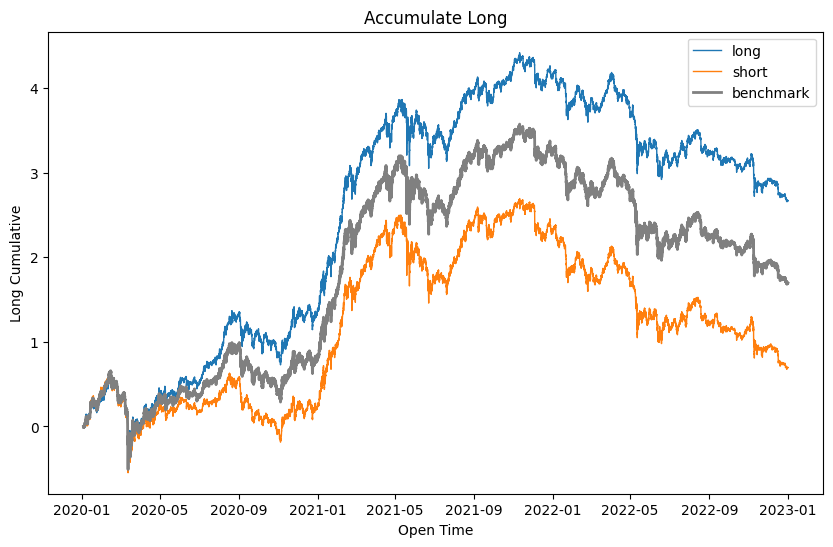

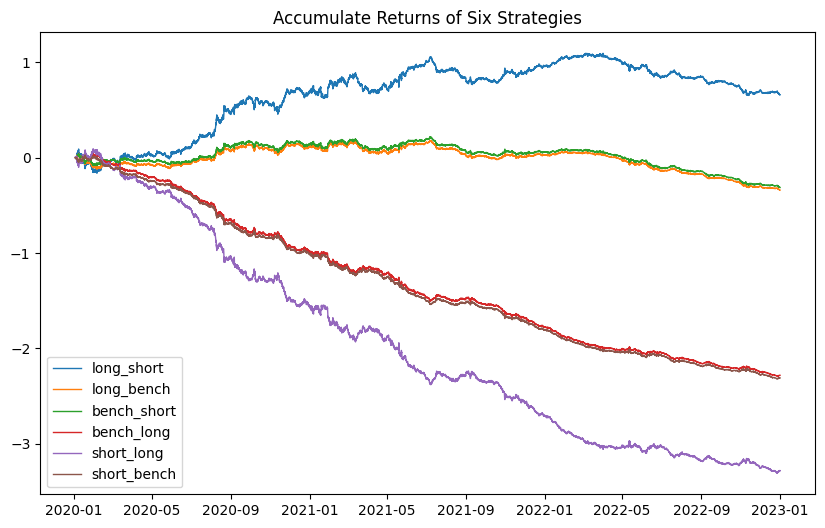

long: 
ann_return = 0.8897  sharpe = 0.7933  maxdd = 0.7006  calmar_ratio = 1.2699  

short: 
ann_return = 0.2321  sharpe = 0.217  maxdd = 0.7243  calmar_ratio = 0.3204  

bench: 
ann_return = 0.5655  sharpe = 0.5208  maxdd = 0.7037  calmar_ratio = 0.8036  

long_short: 
ann_return = 0.2197  sharpe = 0.7482  maxdd = 0.2314  calmar_ratio = 0.9493  

long_bench: 
ann_return = -0.1138  sharpe = -0.7689  maxdd = 0.441  calmar_ratio = -0.258  

bench_long: 
ann_return = -0.7622  sharpe = -5.1506  maxdd = 2.2446  calmar_ratio = -0.3396  

short_long: 
ann_return = -1.0957  sharpe = -3.7317  maxdd = 3.1199  calmar_ratio = -0.3512  

short_bench: 
ann_return = -0.7715  sharpe = -5.2507  maxdd = 2.2885  calmar_ratio = -0.3371  

bench_short: 
ann_return = -0.1045  sharpe = -0.7115  maxdd = 0.4359  calmar_ratio = -0.2398  



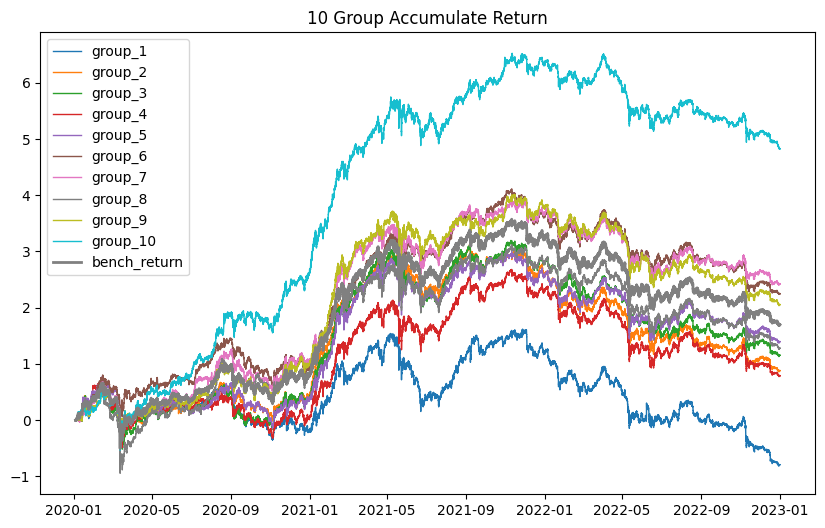

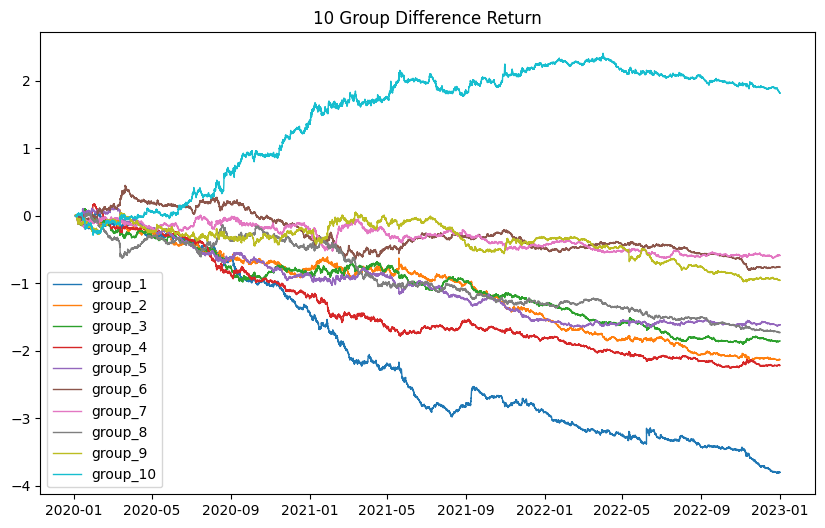

group_1: 
ann_return = -0.2663  sharpe = -0.2436  maxdd = 0.9299  calmar_ratio = -0.2863  

group_2: 
ann_return = 0.2916  sharpe = 0.2645  maxdd = 0.5851  calmar_ratio = 0.4983  

group_3: 
ann_return = 0.384  sharpe = 0.3471  maxdd = 0.781  calmar_ratio = 0.4916  

group_4: 
ann_return = 0.2632  sharpe = 0.235  maxdd = 0.787  calmar_ratio = 0.3344  

group_5: 
ann_return = 0.4643  sharpe = 0.4096  maxdd = 0.6921  calmar_ratio = 0.6709  

group_6: 
ann_return = 0.7496  sharpe = 0.6568  maxdd = 0.5813  calmar_ratio = 1.2897  

group_7: 
ann_return = 0.8071  sharpe = 0.7093  maxdd = 0.6664  calmar_ratio = 1.2112  

group_8: 
ann_return = 0.4262  sharpe = 0.3687  maxdd = 0.9673  calmar_ratio = 0.4407  

group_9: 
ann_return = 0.6843  sharpe = 0.5855  maxdd = 0.6569  calmar_ratio = 1.0417  

group_10: 
ann_return = 1.6103  sharpe = 1.2959  maxdd = 0.7031  calmar_ratio = 2.2901  

-----------------------------------------
group_difference_1: 
ann_return = -1.2698  sharpe = -3.3134  maxdd =

In [2]:
from factor_analysis.factor_analysis import FactorAnalysis

# 假设 result_df 和 data 已经被读取
analysis = FactorAnalysis(result_df, df)
analysis.run_full_analysis()